# Support Class 3

## 1. Geometric Random Walk

Let $X_1, \cdots, X_n$ be independent and identically distributed random variables with $X_i \sim \mathcal{N}(\mu, \sigma^2)$, where $\mu \in \mathbb{R}$, $\sigma^2>0$.

$\{Y_n:n>0\}$ is a discrete-time random walk on $\mathbb{R}$ with $Y_{n+1} = Y_{n} + X_{n+1}$, $Y_0 =0$.

$\{Z_n: n \in \mathcal{N} \}$ is a discrete-time process on $[0, \infty)$ with $Z_n = \exp(Y_n)$. $\{Z_n : n \in \mathcal{N}\}$ is called the **geometric random walk**.

In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 One Realisation

Simulate $Z_n$ for one realisation:

In [2]:
rng = default_rng()
mu = -0.01
sigma = 0.2
t_max = 1000

X = np.zeros(t_max)
X[1:] = rng.normal(mu, sigma, t_max-1)
Y = np.cumsum(X)
Z = np.exp(Y)

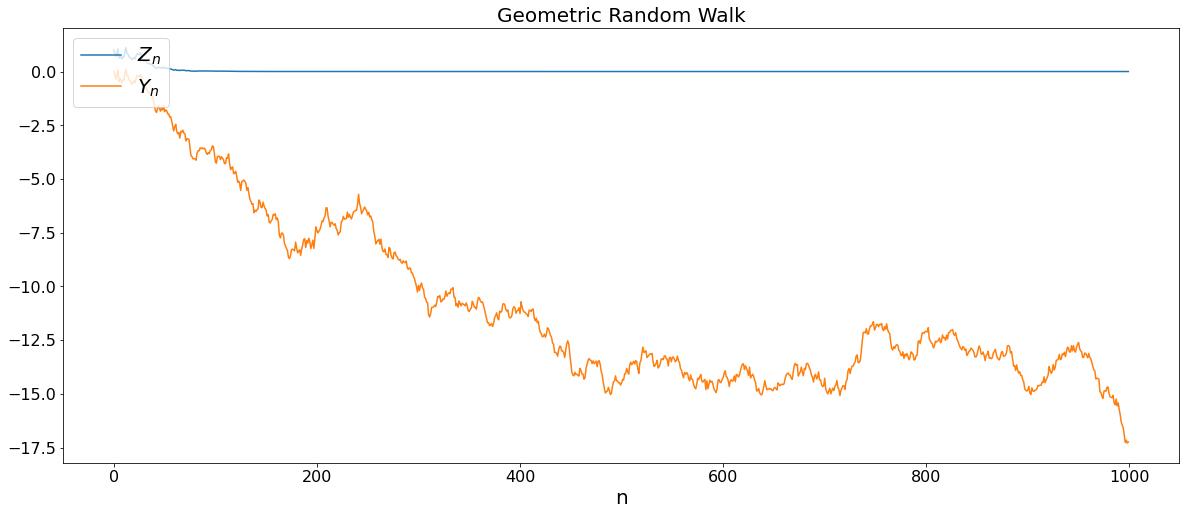

In [3]:
plt.figure(figsize=(20,8))
plt.plot(range(t_max), Z, label=r'$Z_n$')
plt.plot(range(t_max), Y, label=r'$Y_n$')
plt.title('Geometric Random Walk', fontsize=20)
plt.xlabel('n', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

### 1.2 500 Realisations

How would you simulate this for $500$ realisations?

Now compute multiple realisations (problem sheet, $M=500$).

#### 1.2.1 Empirical Mean

Calculate the empirical average with error bars (similar to support class 1)

In [4]:
rng = default_rng()
mu = -0.01
sigma = 0.2
t_max = 1000
M = 500

X = np.zeros((M, t_max))
X[:, 1:] = rng.normal(mu, sigma, (M, t_max-1))
Y = np.cumsum(X, axis=1)
Z = np.exp(Y)

average = np.mean(Z, axis=0)
std = np.std(Z, axis=0)

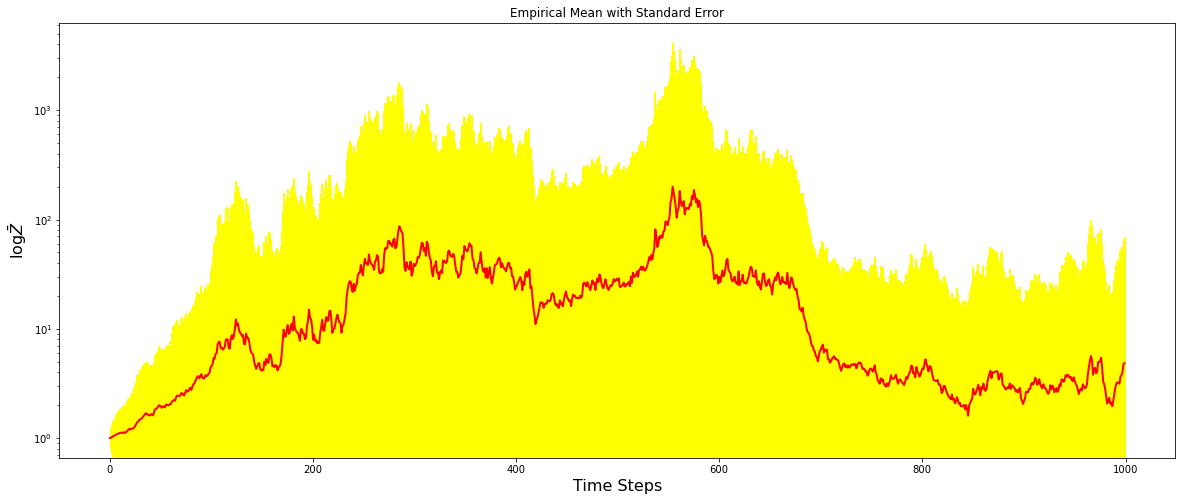

In [5]:
plt.figure(figsize=(20, 8))
plt.errorbar(range(t_max), average, yerr=std, color='r', ecolor='yellow', linewidth=2)
plt.xlabel("Time Steps", fontsize=16)
plt.ylabel(r"$\log \bar{Z}$", fontsize=16)
plt.yscale('log')
plt.title("Empirical Mean with Standard Error");

#### 1.2.2 Ergodic Mean

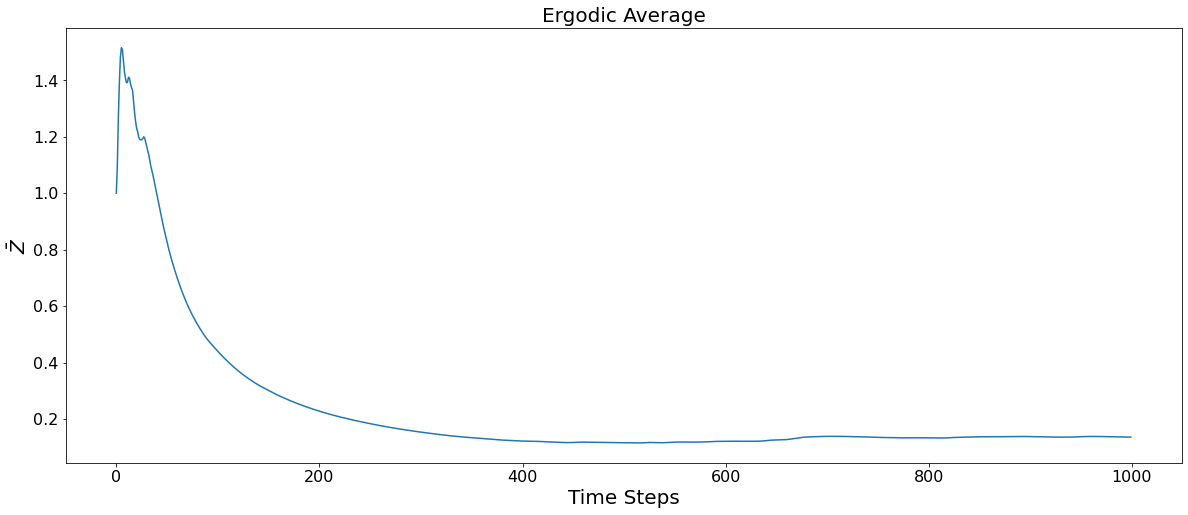

In [6]:
# ergodic average
ergodic_average = [x/y for x,y in zip(np.cumsum(Z), range(1,t_max+1))]

plt.figure(figsize = (20,8) )
plt.plot(range(t_max), ergodic_average)
plt.title('Ergodic Average', fontsize=20)
plt.xlabel("Time Steps", fontsize=20)
plt.ylabel(r"$\bar{Z}$", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

### 1.3 Empirical Tail

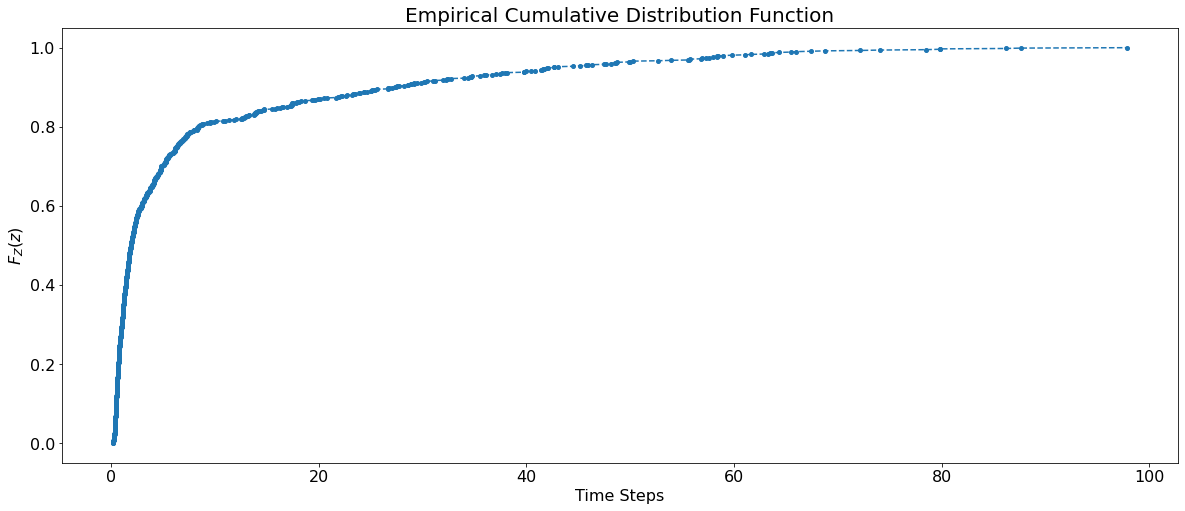

In [7]:
from statsmodels.distributions.empirical_distribution import ECDF


plt.figure(figsize=(20, 8))
ecdf = ECDF(Z[-1, :])
plt.plot(ecdf.x, ecdf.y, linestyle='--', marker='o', ms=4)
plt.xlabel("Time Steps", fontsize=16)
plt.ylabel(r"$F_Z(z)$", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Empirical Cumulative Distribution Function", fontsize=20);

## 2. Wright-Fisher Model of Population Genetics

Fixed population of $L$ individuals.
Initially, $X_0(i) = i$ for $i \in \{1,...,L\}$.

At each generation $t+1$, each individual $i$ picks uniformally a parent $U\left(\{1,...,L\}\right)$ and adopts its type. Let $X_t(j)$ denote the type of individual $j$ at time $t$. If individual $i$ adopts $j$'s type at time $t+1$, then 

$$X_{t+1}(i) = X_t(j)$$

I suggest using `plt.pcolor(X)` or `sns.heatmap` to plot the dynamics (or `plt.imshow` but this is less successful)

### 2.1 One Realisation

In [8]:
rng = default_rng()
t_max = 400
L = 100

X = np.zeros((t_max, L)) # each row of X is a new generation
X[0, :] = range(L) # initially individual i has type i (going from 0 - 99)

In [9]:
for t in range(1, t_max):
    old_states = X[t-1, :]
    new_states = [old_states[r] for r in rng.integers(0, L, L)]
    X[t, :] = np.sort(new_states)

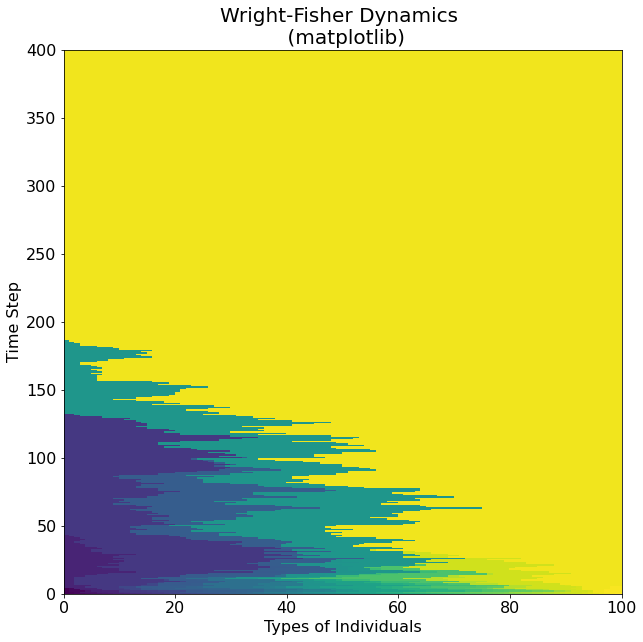

In [10]:
plt.figure(figsize=(10, 10))
plt.ylabel('Time Step', fontsize = 16)
plt.xlabel("Types of Individuals", fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Wright-Fisher Dynamics \n (matplotlib)', fontsize = 20)
plt.pcolor(X);

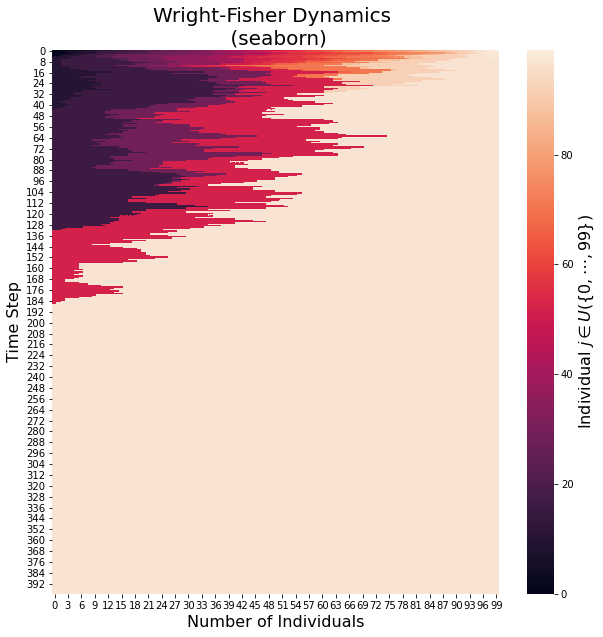

In [11]:
plt.figure(figsize=(10, 10))
pcm = sns.heatmap(X, cbar_kws={'label': r'Individual $j \in U( \{0,\cdots, 99 \} )$'})
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.ylabel('Time Step', fontsize = 16)
plt.xlabel('Number of Individuals', fontsize = 16)
plt.title('Wright-Fisher Dynamics \n (seaborn)', fontsize = 20);

### 2.2 50 Realisations

Plot the average steps to reach stationary distribution against the number of individuals $L$.

In [12]:
def absorption(v):
    u = np.unique(v)
    if u.size > 1:
        return False
    else:
        return True

In [13]:
rng = default_rng()
L_max = 100
t_max = 500
num_rls = 50 # number of realisations
abs_steps = np.zeros((num_rls, L_max)) # matrix of steps to reach absorption


for L in range(1, L_max+1):
    for i in range(0, num_rls):
        X = np.zeros((t_max+1, L))
        X[0, :] = range(0, L) # individual i initially has type i
        for t in range(1, t_max+1):
            old_states = X[t-1, :]
            new_states = [old_states[r] for r in rng.integers(0, L, L)]
            new_states = np.sort(new_states)
            X[t, :] = new_states
            abs_steps[i, L-1] = t
            if absorption(new_states):
                break

In [14]:
average = np.mean(abs_steps, axis=0)
deviation = np.std(abs_steps, axis=0)

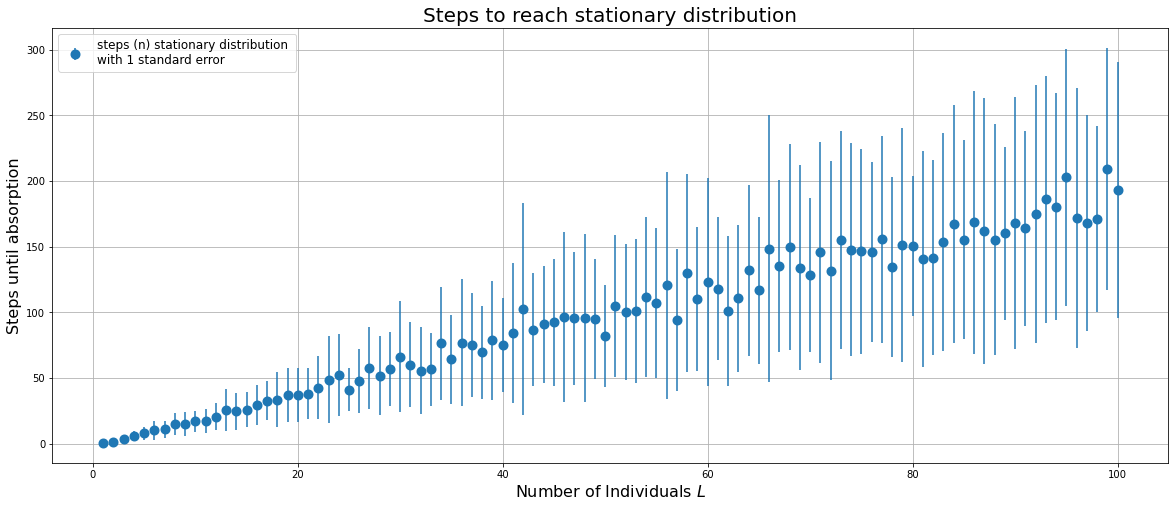

In [15]:
plt.figure(figsize = (20,8))
plt.ylabel('Steps until absorption', fontsize=16)
plt.xlabel(r'Number of Individuals $L$', fontsize=16)
plt.title('Steps to reach stationary distribution', fontsize=20)

plt.errorbar(range(1, L_max+1), average, yerr = deviation, fmt = 'o', mew = 4, 
             label = 'steps (n) stationary distribution \nwith 1 standard error')
plt.legend(loc='upper left', fontsize = 12)
plt.grid()